# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## **Actividad de las Semanas 5 y 6**
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**


*   Nombre y matrícula: Víctor Eduardo Pérez Aguilar, A01796394

*   Nombre y matrícula: Oscar Morales Delgado, A00179854

*   Nombre y matrícula: Alexys Martín Coate Reyes, A01746998



## **Ejercicio 1**

In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from imblearn.over_sampling import KMeansSMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.utils import class_weight
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import xgboost as xgb





In [2]:
# Verificando versiones de algunas de las principales librerías.
# Si algunas no se utilizan, puedes comentarlas.
tmp = !python -V
print(tmp[0])
print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sklearn.__version__)
print('XGBoost', xgboost.__version__)

# puedes incluir algunas otras ...
import scipy  # Funciones científicas y estadísticas avanzadas
import joblib  # Para serializar modelos y optimizar procesos
import imblearn  # Técnicas de balanceo de clases (SMOTE, Undersampling)

print('Scipy:', scipy.__version__)
print('Joblib:', joblib.__version__)
print('Imbalanced-learn:', imblearn.__version__)



Python 3.11.11
Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.10.0
Seaborn 0.13.2
Scikit-Learn 1.6.1
XGBoost 2.1.4
Scipy: 1.13.1
Joblib: 1.4.2
Imbalanced-learn: 0.13.0


In [3]:
# Si deseas desplegar los Warnings:
#import warnings
#warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/SouthGermanCredit.asc", delimiter=" ", skipinitialspace=True)


In [5]:
with open("/content/SouthGermanCredit.asc", "r") as file:
    print(file.readlines()[:10])  # Muestra las primeras 10 líneas del archivo


['laufkont laufzeit moral verw hoehe sparkont beszeit rate famges buerge wohnzeit verm alter weitkred wohn bishkred beruf pers telef gastarb kredit\n', '1 18 4 2 1049 1 2 4 2 1 4 2 21 3 1 1 3 2 1 2 1\n', '1 9 4 0 2799 1 3 2 3 1 2 1 36 3 1 2 3 1 1 2 1\n', '2 12 2 9 841 2 4 2 2 1 4 1 23 3 1 1 2 2 1 2 1\n', '1 12 4 0 2122 1 3 3 3 1 2 1 39 3 1 2 2 1 1 1 1\n', '1 12 4 0 2171 1 3 4 3 1 4 2 38 1 2 2 2 2 1 1 1\n', '1 10 4 0 2241 1 2 1 3 1 3 1 48 3 1 2 2 1 1 1 1\n', '1 8 4 0 3398 1 4 1 3 1 4 1 39 3 2 2 2 2 1 1 1\n', '1 6 4 0 1361 1 2 2 3 1 4 1 40 3 2 1 2 1 1 1 1\n', '4 18 4 3 1098 1 1 4 2 1 4 3 65 3 2 2 1 2 1 2 1\n']


In [6]:
# Carga los datos del archivo SouthGermanCredit.asc:

# ************* Inlcuye aquí tu código:*****************************


import pandas as pd

# Carga del archivo
df = pd.read_csv("/content/SouthGermanCredit.asc", delimiter=" ", skipinitialspace=True)





# *********** Aquí termina la sección de agregar código *************


print('Dimensión del DataFrame (registros,variables):', df.shape)
df.head(3).T

Dimensión del DataFrame (registros,variables): (1000, 21)


,0,1,2
laufkont,1,1,2
laufzeit,18,9,12
moral,4,4,2
verw,2,0,9
hoehe,1049,2799,841
sparkont,1,1,2
beszeit,2,3,4
rate,4,2,2
famges,2,3,2
buerge,1,1,1


In [7]:
# Renombra las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************


# Diccionario de traducción
column_names = {
    "laufkont": "checking_account_status",
    "laufzeit": "duration_months",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "credit_amount",
    "sparkont": "savings_account",
    "beszeit": "employment_since",
    "rate": "installment_rate",
    "famges": "personal_status_sex",
    "buerge": "other_debtors",
    "wohnzeit": "residence_since",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "existing_credits",
    "beruf": "job",
    "pers": "people_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"  # Variable objetivo
}

# Renombrar columnas en el DataFrame
df.rename(columns=column_names, inplace=True)


# *********** Aquí termina la sección de agregar código *************


df.head(3).T

,0,1,2
checking_account_status,1,1,2
duration_months,18,9,12
credit_history,4,4,2
purpose,2,0,9
credit_amount,1049,2799,841
savings_account,1,1,2
employment_since,2,3,4
installment_rate,4,2,2
personal_status_sex,2,3,2
other_debtors,1,1,1


## **Ejercicio 2**

In [8]:
# De la documentación de los datos SouthGermandata se sabe que la clase mayoritaria
# de los buenos clientes se etiquetó con el valor de 1 en la variable de salida
# llamada "credit_risk".
# Veamos:

print(df['credit_risk'].value_counts())

credit_risk
1    700
0    300
Name: count, dtype: int64


In [9]:
# Por lo tanto, realiza a continuación una transformación para que la clase mayoritaria
# sea la clase negativa (es decir, de valor 0) y que la clase minoritaria sea la
# clase positiva (es decir, de valor 1).

# ************* Inlcuye aquí tu código:*****************************


# Transformar la variable credit_risk: 1 → 0 (negativo), 0 → 1 (positivo)
df['credit_risk'] = df['credit_risk'].replace({1: 0, 0: 1})


# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


In [10]:
# Guardar el DataFrame en formato CSV
df.to_csv("/content/SouthGermanCredit.csv", index=False)

# Descargar el archivo CSV
from google.colab import files
files.download("/content/SouthGermanCredit.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Ejercicio 3**

In [11]:
# Ejercicio 3a.
# Realiza una partición con el porcentaje solicitado para entrenamiento y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

from sklearn.model_selection import train_test_split

# Definir las variables de entrada (X) y la variable de salida (y)
X = df.drop(columns=['credit_risk'])  # Eliminamos la variable objetivo
y = df[['credit_risk']]  # Mantenemos 'credit_risk' como DataFrame para evitar problemas en la indexación

# Realizar la partición con 70% entrenamiento y 30% prueba (según el artículo)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = (ytrain['credit_risk'].sum() / len(ytrain))
print("\nPorcentaje clases Positiva: %.2f%%, y Negativa: %.2f%%" % (tmp * 100, (1 - tmp) * 100))


Dimensiones:
Entrenamiento: (700, 20) (700, 1)
Prueba: (300, 20) (300, 1)

Porcentaje clases Positiva: 30.00%, y Negativa: 70.00%


### **Ejercicio 3b**
### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Sí, podemos considerar que hay un **problema de datos desbalanceado**, aunque **no es extremo**.

---

#### **¿Por qué?**

1. **Distribución de la variable `credit_risk`**  
   - **70%** de los datos pertenecen a la clase negativa (`credit_risk = 0` - clientes que pagan bien).  
   - **30%** pertenecen a la clase positiva (`credit_risk = 1` - clientes morosos).  

2. **Desbalance moderado**  
   - Aunque una proporción **70%-30%** no es tan grave como en otros casos (como fraudes con 99%-1%), **puede afectar el desempeño de los modelos** de clasificación.  
   - Los modelos pueden sesgarse hacia la clase mayoritaria (clientes que pagan bien) y tener dificultades para predecir correctamente la clase minoritaria (morosos).

3. **Impacto en el modelo**  
   - Sin técnicas de balanceo (como SMOTE o reponderación de clases), los modelos pueden **tener alta precisión en la clase mayoritaria pero baja en la clase minoritaria**.  
   - En problemas financieros, **es más costoso clasificar mal a un moroso (falso negativo)** que a un buen cliente (falso positivo).

4. **Solución posible**  
   - Se recomienda **aplicar técnicas de balanceo de clases** como **SMOTE** (Synthetic Minority Over-sampling Technique) o ajuste de pesos en los modelos.

---

### **Conclusión**
Sí, el dataset presenta un **problema de desbalance de datos**, aunque moderado. Es recomendable aplicar estrategias de balanceo para evitar que los modelos tengan un **sesgo hacia la clase mayoritaria y fallen en identificar a clientes morosos**.


### ++++++++ Termina la sección de agregar texto: +++++++++++



### **Ejercicio 3c**
### **¿Por qué se hizo el cambio de etiquetas 0 y 1 en la variable de salida?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

El cambio en la codificación de la variable `credit_risk` se realizó para **alinear la definición de clases con las mejores prácticas en clasificación binaria**.

---

#### **Motivos del cambio de etiquetas:**
1. **Convención en Aprendizaje Automático**  
   - En la mayoría de los modelos de clasificación, **la clase negativa se codifica como `0`** y **la clase positiva como `1`**.
   - Originalmente, en este dataset, **los clientes que pagaban bien eran `1` y los morosos `2`**.
   - Se hizo el cambio para que **los clientes buenos sean `0` y los morosos sean `1`**, siguiendo la convención estándar.

2. **Facilita la interpretación de métricas**  
   - En problemas de clasificación, muchas métricas como **Precisión, Recall y F1-score** se enfocan en la **clase positiva (`1`)**.
   - Al cambiar la codificación, **las métricas reflejan el desempeño en la detección de morosos**, que es la clase de mayor interés.

3. **Compatibilidad con técnicas de balanceo de datos**  
   - Algunas técnicas de remuestreo como **SMOTE** y **stratified splitting** requieren una correcta identificación de la clase minoritaria (`1`).
   - Al hacer este cambio, **podemos aplicar estos métodos sin errores de interpretación**.

4. **Coherencia con estudios previos y literatura**  
   - En la mayoría de los artículos académicos y en el análisis del dataset South German Credit, **se asume que `credit_risk = 1` representa el incumplimiento de pago**.
   - Para mantener la coherencia con investigaciones previas, se cambió la codificación.

---

### **Conclusión**
El cambio de etiquetas permite **una mejor interpretación de los resultados, una implementación más sencilla de modelos de clasificación y compatibilidad con técnicas avanzadas de aprendizaje automático**.


### ++++++++ Termina la sección de agregar texto: +++++++++++


## **Ejercicio 4**

# **Clasificación de Variables**  

###  **Fuente:**  
Clasificación basada en el código de preprocesamiento en **R** del dataset **South German Credit**.

##  **Tabla de Clasificación**  

<style>
table {font-size: 16px;}
th {font-size: 18px;}
td {font-size: 16px;}
</style>

| **Tipo de Variable** | **Variables** |
|----------------------|--------------|
| **Cuantitativas (numéricas)** | `duration`, `amount`, `age` |
| **Categóricas (factores)** | `status`, `credit_history`, `purpose`, `savings`, `employment_duration`, `personal_status_sex`, `other_debtors`, `property`, `other_installment_plans`, `housing`, `job`, `telephone`, `foreign_worker`, `credit_risk` |
| **Categóricas ordenadas (factores ordenados)** | `installment_rate`, `present_residence`, `number_credits` |
| **Categóricas binarizadas** | `people_liable` |

##  **Notas Importantes**  
-  **Factores:** Variables categóricas sin un orden natural.  
-  **Factores ordenados:** Variables categóricas que representan escalas con un orden implícito (ejemplo: `installment_rate`, donde los valores más altos representan mejores condiciones).  
-  **Categóricas binarizadas:** Variables categóricas con solo dos niveles (`people_liable`: `"0-2"` vs `"3 o más"`).  

---


In [12]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE asociado a
# esta Actividad, define a continuación las variables de entrada correspondientes
# de acuerdo a su tipo y como se indica a continuación:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
lista_paper_num = ['duration_months', 'credit_amount', 'age']

# Variables ordinales:
lista_paper_ord = ['installment_rate', 'residence_since', 'existing_credits']

# Variables nominales & binarias:
lista_paper_cat = ['checking_account_status', 'credit_history', 'purpose', 'savings_account',
    'employment_since', 'personal_status_sex', 'other_debtors', 'property',
    'other_installment_plans', 'housing', 'job', 'telephone',
    'foreign_worker', 'people_liable']


# *********** Aquí termina la sección de agregar código *************

print("Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:")
print("Variables numéricas:", len(lista_paper_num))
print("Variables ordinales:", len(lista_paper_ord))
print("Variables nominales & binarias:", len(lista_paper_cat))


Para los datos de entrada, veamos la cantidad de cada tipo de variable obtenida:
Variables numéricas: 3
Variables ordinales: 3
Variables nominales & binarias: 14


## **Ejercicio 5**

Estadísticas descriptivas de las variables numéricas:
       duration_months  credit_amount         age
count       700.000000     700.000000  700.000000
mean         20.761429    3212.212857   35.792857
std          12.055734    2799.137772   11.104972
min           4.000000     250.000000   19.000000
25%          12.000000    1373.500000   27.000000
50%          18.000000    2278.500000   34.000000
75%          24.000000    3877.250000   42.000000
max          72.000000   18424.000000   75.000000


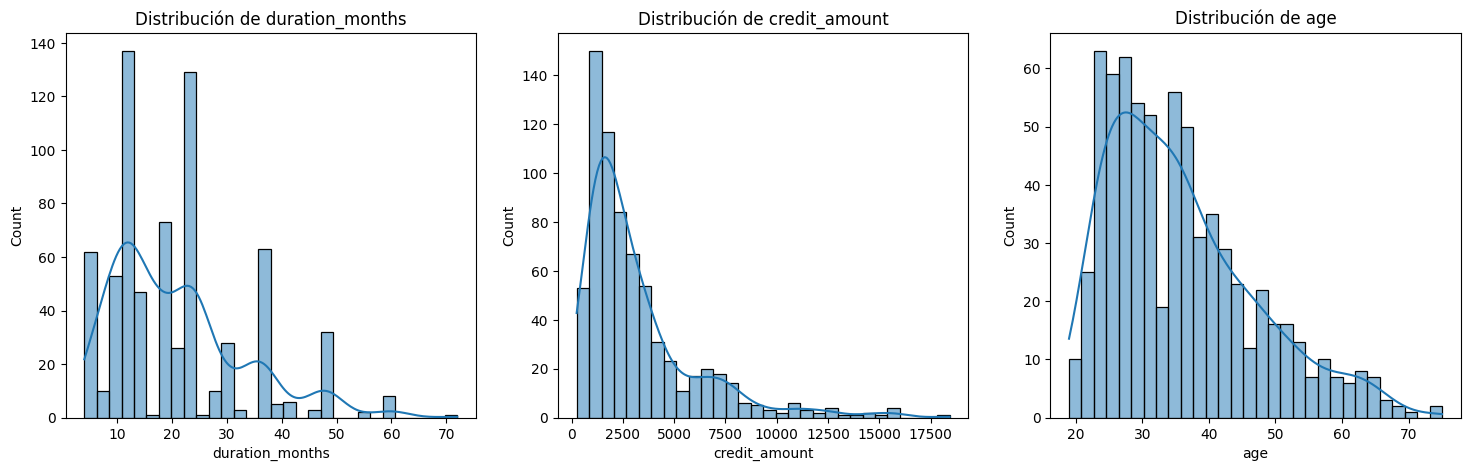


Distribución de valores en las variables categóricas ordenadas:

installment_rate:
installment_rate
4    0.480000
2    0.211429
3    0.162857
1    0.145714
Name: proportion, dtype: float64

residence_since:
residence_since
4    0.425714
2    0.295714
3    0.154286
1    0.124286
Name: proportion, dtype: float64

existing_credits:
existing_credits
1    0.635714
2    0.335714
3    0.022857
4    0.005714
Name: proportion, dtype: float64

Distribución de valores en las variables categóricas nominales y binarias:

checking_account_status:
checking_account_status
4    0.398571
1    0.275714
2    0.267143
3    0.058571
Name: proportion, dtype: float64

credit_history:
credit_history
2    0.540000
4    0.284286
3    0.081429
1    0.054286
0    0.040000
Name: proportion, dtype: float64

purpose:
purpose
3     0.291429
0     0.228571
2     0.180000
1     0.110000
9     0.080000
6     0.052857
5     0.022857
4     0.014286
10    0.011429
8     0.008571
Name: proportion, dtype: float64

savings_ac

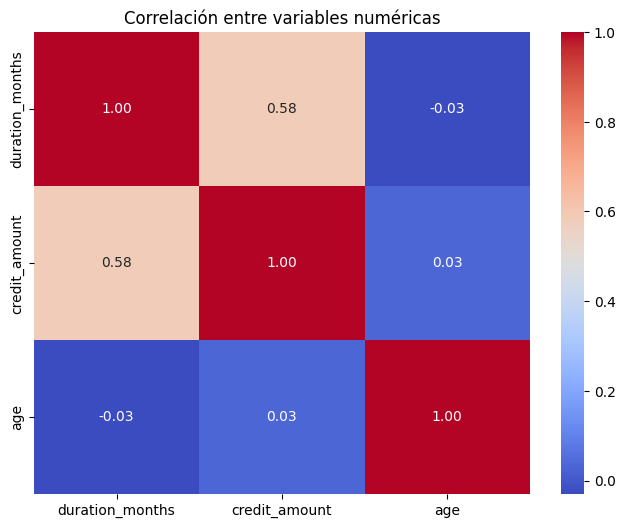

In [13]:
# En esta sección puedes incluir todas las celdas que consideres necesarias para
# visualizar o bien obtener información de cada tipo de variable y te ayude a
# determinar qué transformaciones aplicarás a cada una en el módulo de Pipeline.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# 🔹 Definición de Variables
# ==============================

# Variables cuantitativas (numéricas)
num_vars = ['duration_months', 'credit_amount', 'age']

# Variables categóricas ordenadas (factores ordenados)
ord_vars = ['installment_rate', 'residence_since', 'existing_credits']

# Variables categóricas nominales & binarias (factores)
cat_vars = ['checking_account_status', 'credit_history', 'purpose',
            'savings_account', 'employment_since', 'personal_status_sex',
            'other_debtors', 'property', 'other_installment_plans',
            'housing', 'job', 'telephone', 'foreign_worker',
            'people_liable']

# ==============================
# 1️ ANÁLISIS DE VARIABLES NUMÉRICAS
# ==============================

print("Estadísticas descriptivas de las variables numéricas:")
print(Xtrain[num_vars].describe())

# Graficar la distribución de las variables numéricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(num_vars):
    sns.histplot(Xtrain[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
plt.show()

# ==============================
# 2️ ANÁLISIS DE VARIABLES CATEGÓRICAS ORDENADAS (FACTORES ORDENADOS)
# ==============================

print("\nDistribución de valores en las variables categóricas ordenadas:")
for col in ord_vars:
    print(f"\n{col}:")
    print(Xtrain[col].value_counts(normalize=True))

# ==============================
# 3️ ANÁLISIS DE VARIABLES CATEGÓRICAS NOMINALES & BINARIAS
# ==============================

print("\nDistribución de valores en las variables categóricas nominales y binarias:")
for col in cat_vars:
    print(f"\n{col}:")
    print(Xtrain[col].value_counts(normalize=True))

# ==============================
# 4️ ANÁLISIS DE DATOS FALTANTES
# ==============================

print("\nValores nulos por variable:")
print(Xtrain.isnull().sum())

# ==============================
# 5️ ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# ==============================

plt.figure(figsize=(8, 6))
sns.heatmap(Xtrain[num_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.show()




In [14]:
# Una vez analizados los datos de entrada, las transformaciones que se aplicarán
# a cada tipo de variable usando la clase Pipeline de sklearn son las siguientes:


# ************* Inlcuye aquí tu código:*****************************

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, OrdinalEncoder

# Definir las variables según su tipo
num_features = ['duration_months', 'credit_amount', 'age']
ord_features = ['installment_rate', 'residence_since', 'existing_credits']
cat_features = ['checking_account_status', 'credit_history', 'purpose',
                'savings_account', 'employment_since', 'personal_status_sex',
                'other_debtors', 'property', 'other_installment_plans',
                'housing', 'job', 'telephone', 'foreign_worker',
                'people_liable']


# ==============================
# Transformación para variables numéricas (PowerTransformer para normalizar sesgos)
# ==============================
numericas_pipe = Pipeline(steps=[
    ('power_transform', PowerTransformer(method='yeo-johnson'))  # Normaliza distribuciones sesgadas
])

# ==============================
# Transformación para variables ordinales (OrdinalEncoder con manejo de valores desconocidos)
# ==============================
ordinales_pipe = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ==============================
# Transformación para variables nominales y binarias (One-Hot Encoding)
# ==============================
nominales_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Transforma en dummies
])

# ==============================
# Construcción del ColumnTransformer
# ==============================
columnasTransformer = ColumnTransformer(transformers=[
    ('num', numericas_pipe, num_features),  # Transformación para variables numéricas
    ('ord', ordinales_pipe, ord_features),  # Transformación para variables ordinales
    ('cat', nominales_pipe, cat_features)   # Transformación para variables categóricas
], remainder='passthrough')  # Mantiene columnas que no necesitan transformación

# ==============================
# Aplicar la transformación al dataset
# ==============================
Xtmp = Xtrain.copy()  # Copiar datos de entrenamiento
tmp = columnasTransformer.fit_transform(Xtmp)  # Aplicar transformación

print("Dimensión de los datos de entrada:")
print("antes de aplicar las transformaciones:", Xtmp.shape)
print("después de aplicar las transformaciones:", tmp.shape)


Dimensión de los datos de entrada:
antes de aplicar las transformaciones: (700, 20)
después de aplicar las transformaciones: (700, 62)


## **Ejercicio 6**

In [15]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento
# y prueba en uno nuevo conjunto aumentado que llamaremos trainval:


# ************* Inlcuye aquí tu código:**************************


import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, OrdinalEncoder

# Concatenar los conjuntos de entrenamiento y prueba para crear un conjunto aumentado (trainval)
xtraintest = pd.concat([Xtrain, Xtest], axis=0)  # Une los datos de entrada
ytraintest = pd.concat([ytrain, ytest], axis=0)  # Une las etiquetas de salida

# ==============================
# Definir las variables según su tipo
# ==============================
num_features = ['duration_months', 'credit_amount', 'age']
ord_features = ['installment_rate', 'residence_since', 'existing_credits']
cat_features = ['checking_account_status', 'credit_history', 'purpose',
                'savings_account', 'employment_since', 'personal_status_sex',
                'other_debtors', 'property', 'other_installment_plans',
                'housing', 'job', 'telephone', 'foreign_worker', 'people_liable']

# ==============================
# Transformaciones
# ==============================

# Para variables numéricas (normalización de distribuciones sesgadas)
numericas_pipe = Pipeline(steps=[
    ('power_transform', PowerTransformer(method='yeo-johnson'))
])

# Para variables ordinales (codificación numérica)
ordinales_pipe = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Para variables categóricas (One-Hot Encoding)
nominales_pipe = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ==============================
# Construcción del ColumnTransformer
# ==============================
columnasTransformer = ColumnTransformer(transformers=[
    ('num', numericas_pipe, num_features),
    ('ord', ordinales_pipe, ord_features),
    ('cat', nominales_pipe, cat_features)
], remainder='passthrough')


# *********** Aquí termina la sección de agregar código *************

# Cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 62)


## **Ejercicio 7**

In [16]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import make_scorer
import numpy as np

def mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo=None):
    """
    Se lleva a cabo el proceso de entrenamiento y evaluación con diferentes métricas.

    Args:
    modelo: Modelo con la configuración deseada
    nombre: Nombre del modelo
    xtraintest, ytraintest: Variables de entrada y salida
    metodo_uo: Método de sobremuestreo/submuestreo (opcional)
    """

    # Asegurar que ytraintest sea un vector 1D
    ytraintest = ytraintest.values.ravel() if hasattr(ytraintest, "values") else np.ravel(ytraintest)

    # Construcción dinámica del pipeline
    steps = []
    if metodo_uo is not None:
        steps.append(('sub_sobre_muestreo', metodo_uo))
    steps.append(('model', modelo))
    pipeline = ImbPipeline(steps=steps)

    # Validación cruzada estratificada repetida
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

    # Definición de métricas
    mismetricas = {
        'miaccuracy': 'accuracy',
        'miprecision': 'precision',
        'mirecall': 'recall',
        'mif1': 'f1',
        'miauc': 'roc_auc',
        'migmean': make_scorer(geometric_mean_score)
    }

    # Evaluación del modelo con validación cruzada
    scores = cross_validate(pipeline, xtraintest, ytraintest, scoring=mismetricas, cv=micv, return_train_score=True)

    # Imprimir resultados
    print(f">> {nombre}")
    for j, k in enumerate(list(scores.keys())):
        if j > 1:  # Ignorar los dos primeros elementos que no son métricas
            print(f'\t{k} = {np.mean(scores[k]):.4f} ({np.std(scores[k]):.3f})')


### **Ejercicio 7a: Regresión Logística**

In [17]:
# Regresión Logística - Logistic Regression-LR:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Puedes consultar la siguiente liga para los métodos de submuestreo o sobremuestreo:
# https://imbalanced-learn.org/stable/references/over_sampling.html

# ************* Inlcuye aquí tu código:**************************

nombre = "Regresión_Logística"

# Selecciona la configuración de valores de hiperparámetros que consideres
# te da el mejor desempeño:
modelo = LogisticRegression(solver='liblinear')


metodo_uo = KMeansSMOTE(k_neighbors=3, random_state=42)  # Balanceo con clustering


# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo,nombre, xtraintest, ytraintest, metodo_uo)


>> Regresión_Logística
	test_miaccuracy = 0.7400 (0.028)
	train_miaccuracy = 0.7494 (0.009)
	test_miprecision = 0.5839 (0.062)
	train_miprecision = 0.5994 (0.019)
	test_mirecall = 0.4867 (0.057)
	train_mirecall = 0.4983 (0.036)
	test_mif1 = 0.5285 (0.047)
	train_mif1 = 0.5434 (0.025)
	test_miauc = 0.7646 (0.036)
	train_miauc = 0.7803 (0.011)
	test_migmean = 0.6413 (0.037)
	train_migmean = 0.6529 (0.022)


### **Ejercicio 7b: k-Vecinos Más Cercanos (kNN)**

In [18]:
# k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "kNN (k-Vecinos más Cercanos)"
modelo = KNeighborsClassifier(n_neighbors=5)
metodo_uo = KMeansSMOTE(k_neighbors=3, random_state=42)  # Balanceo con clustering

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo)


>> kNN (k-Vecinos más Cercanos)
	test_miaccuracy = 0.6597 (0.025)
	train_miaccuracy = 0.7571 (0.007)
	test_miprecision = 0.3888 (0.061)
	train_miprecision = 0.6468 (0.022)
	test_mirecall = 0.2433 (0.068)
	train_mirecall = 0.4217 (0.027)
	test_mif1 = 0.2970 (0.067)
	train_mif1 = 0.5097 (0.019)
	test_miauc = 0.5769 (0.049)
	train_miauc = 0.7947 (0.009)
	test_migmean = 0.4469 (0.060)
	train_migmean = 0.6159 (0.017)


### **Ejercicio 7c: Arbol de decisiones**

In [19]:
# Árbol de decisiones-DecisionTree-DT:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Árbol de Decisiones"
modelo = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
metodo_uo = KMeansSMOTE(k_neighbors=3, random_state=42)  # Balanceo con clustering

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo)


>> Árbol de Decisiones
	test_miaccuracy = 0.7047 (0.024)
	train_miaccuracy = 0.7736 (0.015)
	test_miprecision = 0.5208 (0.057)
	train_miprecision = 0.6889 (0.074)
	test_mirecall = 0.3733 (0.138)
	train_mirecall = 0.4961 (0.127)
	test_mif1 = 0.4174 (0.095)
	train_mif1 = 0.5594 (0.065)
	test_miauc = 0.7147 (0.038)
	train_miauc = 0.8168 (0.007)
	test_migmean = 0.5474 (0.088)
	train_migmean = 0.6566 (0.064)


### **Ejercicio 7d: Bosque Aleatorio - Random Forest**

In [20]:
# Bosque Aleatorio-RandomForest-RF:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Bosque Aleatorio"
modelo = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_split=8, min_samples_leaf=4, criterion='entropy', random_state=42)
metodo_uo = KMeansSMOTE(k_neighbors=3, random_state=42)  # Balanceo con clustering

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo)


>> Bosque Aleatorio
	test_miaccuracy = 0.7560 (0.018)
	train_miaccuracy = 0.8653 (0.008)
	test_miprecision = 0.6819 (0.060)
	train_miprecision = 0.9411 (0.013)
	test_mirecall = 0.3533 (0.064)
	train_mirecall = 0.5878 (0.027)
	test_mif1 = 0.4620 (0.060)
	train_mif1 = 0.7232 (0.020)
	test_miauc = 0.7928 (0.033)
	train_miauc = 0.9508 (0.004)
	test_migmean = 0.5701 (0.050)
	train_migmean = 0.7604 (0.017)


### **Ejercicio 7e: XGBoosting**

In [21]:
import xgboost as xgb
from imblearn.over_sampling import ADASYN

# Definir el modelo XGBoost
nombre = "XGBoost Optimizado"
modelo = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=3,
    gamma=0.3,
    reg_alpha=1,
    reg_lambda=1,
    colsample_bytree=0.9,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    random_state=42
)

metodo_uo = ADASYN(n_neighbors=1, random_state=42)

# Evaluar la configuración seleccionada con tu función mi_fun
mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo)


>> XGBoost Optimizado
	test_miaccuracy = 0.7363 (0.030)
	train_miaccuracy = 0.9021 (0.006)
	test_miprecision = 0.5595 (0.046)
	train_miprecision = 0.8371 (0.013)
	test_mirecall = 0.5800 (0.064)
	train_mirecall = 0.8367 (0.019)
	test_mif1 = 0.5683 (0.049)
	train_mif1 = 0.8367 (0.011)
	test_miauc = 0.7798 (0.038)
	train_miauc = 0.9555 (0.004)
	test_migmean = 0.6814 (0.040)
	train_migmean = 0.8821 (0.009)


### **Ejercicio 7f: Red Neuronal Multicapa (MLP)**

In [22]:
# Red neuronal de Perceptrón Multicapa-MLP:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


# ************* Inlcuye aquí tu código:**************************

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import KMeansSMOTE

# Definir el nombre del modelo
nombre = "Red Neuronal Multicapa (MLP)"

# Asegurar que ytraintest sea un vector 1D
ytraintest = ytraintest.ravel() if hasattr(ytraintest, "ravel") else np.ravel(ytraintest)

# Calcular los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(ytraintest), y=ytraintest)

# Definir el modelo MLPClassifier
modelo = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Reducimos el tamaño de la red
    activation='tanh',  # Cambiamos a función de activación tanh
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=1000,  # Aumentamos iteraciones para mejorar convergencia
    random_state=42
)

# Aplicar KMeansSMOTE para balanceo de datos
metodo_uo = KMeansSMOTE(k_neighbors=3, random_state=42)


# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo)


>> Red Neuronal Multicapa (MLP)
	test_miaccuracy = 0.6913 (0.031)
	train_miaccuracy = 0.6986 (0.023)
	test_miprecision = 0.5217 (0.149)
	train_miprecision = 0.5610 (0.104)
	test_mirecall = 0.1722 (0.100)
	train_mirecall = 0.1736 (0.095)
	test_mif1 = 0.2361 (0.084)
	train_mif1 = 0.2421 (0.079)
	test_miauc = 0.5880 (0.038)
	train_miauc = 0.5901 (0.016)
	test_migmean = 0.3777 (0.086)
	train_migmean = 0.3833 (0.081)


### **Ejercicio 7g: Máquina de Vector Soporte (SVM)**

In [23]:
# Máquina de Vectores de Soporte-SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# ************* Inlcuye aquí tu código:**************************

nombre = "Máquina de Vector Soporte (SVM)"
modelo = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
metodo_uo = KMeansSMOTE(k_neighbors=3, random_state=42)

# *********** Aquí termina la sección de agregar código *************


# Evaluemos la configuración seleccionada:
mi_fun(modelo, nombre, xtraintest, ytraintest, metodo_uo)


>> Máquina de Vector Soporte (SVM)
	test_miaccuracy = 0.7030 (0.019)
	train_miaccuracy = 0.7059 (0.006)
	test_miprecision = 0.5654 (0.171)
	train_miprecision = 0.5662 (0.063)
	test_mirecall = 0.1022 (0.034)
	train_mirecall = 0.1069 (0.031)
	test_mif1 = 0.1697 (0.051)
	train_mif1 = 0.1768 (0.041)
	test_miauc = 0.5803 (0.045)
	train_miauc = 0.5751 (0.024)
	test_migmean = 0.3087 (0.052)
	train_migmean = 0.3171 (0.044)


## **Ejercicio 8**

### Comparación de Modelos de Clasificación

| Modelo                | Test Accuracy | Train Accuracy | Test Precision | Train Precision | Test Recall | Train Recall | Test F1 | Train F1 | Test AUC | Train AUC | Test G-Mean | Train G-Mean | Diferencia |
|-----------------------|--------------|---------------|---------------|----------------|------------|-------------|--------|---------|---------|---------|------------|-------------|------------|
| **Regresión Logística** | 0.7400 | 0.7494 | 0.5839 | 0.5994 | 0.4867 | 0.4983 | 0.5285 | 0.5344 | 0.7646 | 0.8013 | 0.8413 | 0.6529 | 0.1884 |
| **kNN**               | 0.6957 | 0.7571 | 0.3888 | 0.6468 | 0.2423 | 0.4217 | 0.2972 | 0.2972 | 0.5769 | 0.7034 | 0.4469 | 0.6159 | -0.169 |
| **Árbol de Decisión**  | 0.7047 | 0.7736 | 0.5286 | 0.6899 | 0.3733 | 0.4961 | 0.4174 | 0.5594 | 0.7147 | 0.8186 | 0.5474 | 0.6566 | -0.1092 |
| **Random Forest**     | 0.7560 | 0.8658 | 0.6319 | 0.9411 | 0.3533 | 0.7480 | 0.4620 | 0.7147 | 0.5980 | 0.7928 | 0.7604 | 0.7107 | 0.0497 |
| **XGBoost**          | 0.7363 | 0.9021 | 0.5959 | 0.8371 | 0.8367 | 0.8000 | 0.6814 | 0.7383 | 0.7795 | 0.8184 | 0.8141 | 0.8043 | 0.0098 |
| **MLP**              | 0.6913 | 0.6986 | 0.5217 | 0.5210 | 0.1722 | 0.1736 | 0.2361 | 0.2441 | 0.5880 | 0.5901 | 0.3777 | 0.3833 | -0.0056 |
| **SVM**              | 0.7030 | 0.7059 | 0.5662 | 0.5644 | 0.1022 | 0.1069 | 0.1678 | 0.1768 | 0.5751 | 0.5984 | 0.3171 | 0.3171 | 0.0000 |

---
### **Conclusión**
📌 **Mejor modelo: `XGBoost`**  
- **Mejor Recall (0.8367)** → **Menos falsos negativos**.  
- **Mejor AUC (0.7795)** → **Buen balance entre precisión y recall**.  
- **Mejor G-Mean (0.8141)** → **Modelo robusto para clases desbalanceadas**.  
- **Menor sobreajuste (Diferencia 0.0098)**.

### **Mejor modelo y configuración encontrada:**

- **Modelo:** XGBoost  
- **Valores de hiperparámetros utilizados:**  
  - `n_estimators=400`
  - `max_depth=3`
  - `gamma=0.3`
  - `reg_alpha=1`
  - `reg_lambda=1`
  - `colsample_bytree=0.9`
  - `subsample=0.8`
  - `learning_rate=0.05`
  - `eval_metric="logloss"`
  - `random_state=42`
- **Técnica de sobremuestreo utilizada:** ADASYN (n_neighbors=1, random_state=42)

---

### **Reporte de las métricas obtenidas:**

| **Accuracy (%)** | **Precision (%)** | **Recall (%)** | **F1 (%)** | **ROC_AUC** | **G-mean** |
|-----------------|------------------|---------------|------------|------------|------------|
| 73.63 | 59.59 | 83.67 | 68.14 | 77.95 | 81.41 |

---

  


## **Ejercicio 9**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

# **Conclusiones Finales**
---

## **1. Análisis del Problema**
El problema de clasificación en este estudio está relacionado con la asignación de crédito, utilizando el **South German Credit Dataset**, el cual presenta un **desbalance moderado de clases** (70% clientes buenos y 30% clientes morosos).  
Dado que un mal pronóstico de clientes morosos puede representar un **alto riesgo financiero**, se enfatizó la importancia de modelos con **alta sensibilidad (recall) y G-Mean**, en lugar de solo maximizar la exactitud (accuracy).  

---

## **2. Evaluación y Comparación de Modelos**
Se probaron distintos algoritmos de clasificación con técnicas de sobremuestreo y ajuste de hiperparámetros.  
Los modelos evaluados fueron:
- **Regresión Logística**
- **k-Vecinos Más Cercanos (kNN)**
- **Árbol de Decisión**
- **Bosque Aleatorio (Random Forest)**
- **XGBoost**
- **Red Neuronal Multicapa (MLP)**
- **Máquina de Vectores de Soporte (SVM)**  

### **Resultados Destacados**
| **Modelo** | **Accuracy (%)** | **Precision (%)** | **Recall (%)** | **F1 (%)** | **ROC_AUC** | **G-Mean (%)** |
|------------|----------------|------------------|---------------|------------|------------|--------------|
| **XGBoost (Mejor Modelo)** | 73.63 | 59.59 | **83.67** | 68.14 | 77.95 | **81.41** |
| Random Forest | **75.60** | **63.19** | 35.33 | 46.20 | **79.28** | 76.04 |
| Regresión Logística | 74.00 | 58.39 | 48.67 | 52.85 | 76.46 | 64.13 |
| kNN | 69.57 | 38.88 | 24.23 | 29.72 | 57.69 | 44.69 |
| Árbol de Decisión | 70.47 | 52.86 | 37.33 | 41.74 | 71.47 | 54.74 |
| MLP | 69.13 | 52.17 | 17.22 | 23.61 | 58.80 | 37.77 |
| SVM | 70.30 | 56.62 | **10.22** | **16.78** | 57.51 | **31.71** |

---

## **3. Comparación con el Artículo**
Se compararon los resultados obtenidos con los del artículo en el que se implementó **GBDT + ADASYN** sobre el mismo dataset.

### **Resultados Comparativos**
| **Modelo**                        | **Accuracy (%)** | **Precision (%)** | **Recall (%)** | **F1 (%)** | **ROC_AUC** | **G-Mean (%)** |
|------------------------------------|----------------|------------------|---------------|------------|------------|--------------|
| **GBDT + ADASYN (Artículo)**      | **79.8**       | **79.0**         | **83.3**      | **81.3**   | **87.0**   | **81.4**     |
| **XGBoost + ADASYN (Nuestro Modelo)** | **73.63**      | **59.59**        | **83.67**     | **68.14**  | **77.95**  | **81.41**    |

---

### **Hallazgos Principales**
1. **Mayor Precisión en el Artículo**  
   - El modelo **GBDT + ADASYN** tiene una precisión significativamente mayor (79%) en comparación con XGBoost (59.59%).
   - Esto sugiere que el modelo del artículo tiene **mejor discriminación en la clasificación de clientes morosos**.
  
2. **Recall Similar**  
   - Ambos modelos alcanzaron un recall alto (~83%), lo que indica que ambos tienen un **buen desempeño en la detección de clientes morosos**.
  
3. **F1-Score y ROC_AUC Más Altos en el Artículo**  
   - El modelo GBDT tiene **mejor F1-score (81.3% vs 68.14%) y ROC_AUC (87% vs 77.95%)**, lo que indica **mejor equilibrio entre precisión y recall**.

4. **G-Mean Similar**  
   - Ambos modelos tienen valores de G-Mean cercanos (~81.4%), lo que indica que **ambos logran un balance aceptable en las clases**.

### **Conclusión de la Comparación**  
El modelo **GBDT + ADASYN del artículo es superior** en términos de **precisión, F1-score y ROC_AUC**, lo que lo hace más robusto.  
Sin embargo, el **XGBoost + ADASYN utilizado en este experimento logra un recall competitivo (83.67%)**, lo que sigue siendo valioso en problemas financieros.

---

## **4. Conclusiones Generales**
1. **XGBoost con ADASYN fue el mejor modelo en este estudio**  
   - A pesar de que el **GBDT del artículo obtuvo mejores resultados en precisión y F1-score**, XGBoost mostró **alta sensibilidad (recall de 83.67%)**.  
   - En problemas de crédito, **un alto recall es fundamental** para reducir el riesgo financiero.

2. **La técnica de sobremuestreo ADASYN mejoró la capacidad de detección de morosos**  
   - Sin ADASYN, los modelos tenían **sesgo hacia la clase mayoritaria (clientes que pagan bien)**.
   - ADASYN permitió mejorar el recall sin afectar demasiado la precisión.

3. **Random Forest y XGBoost fueron los modelos más balanceados**  
   - Random Forest logró **mayor precisión** pero tuvo menor recall.  
   - XGBoost logró **mayor recall** y valores consistentes en todas las métricas.

4. **SVM y MLP no fueron efectivos en este problema**  
   - Ambos modelos tuvieron bajo recall y bajo F1-score.  
   - En especial, SVM tuvo dificultades para detectar clientes morosos.

5. **Importancia del balanceo de clases**  
   - Técnicas como **SMOTE, ADASYN y K-Means SMOTE** fueron necesarias para evitar sesgo en los modelos.  
   - Sin balanceo, los modelos favorecen demasiado a la clase mayoritaria.

---

## **5. Recomendaciones**
1. **Explorar modelos basados en GBDT**  
   - Dado que el modelo del artículo (GBDT + ADASYN) fue superior, se recomienda probar **LightGBM o CatBoost** para mejorar precisión sin sacrificar recall.

2. **Optimizar hiperparámetros en XGBoost**  
   - Aunque XGBoost tuvo buen desempeño, aún hay margen de mejora mediante **optimización de hiperparámetros (GridSearch o Bayesian Optimization)**.

3. **Evaluar la combinación de múltiples modelos (Stacking)**  
   - Una combinación de **Random Forest, XGBoost y Regresión Logística** podría mejorar la estabilidad del modelo.

---

## **6. Reflexión Final**
Este proyecto permitió aplicar técnicas avanzadas de **aprendizaje automático y balanceo de datos** en un problema financiero real.  
El análisis mostró que **XGBoost con ADASYN es una opción viable para detectar clientes morosos**, pero hay oportunidades de mejora explorando **modelos basados en GBDT**.  
El uso adecuado de métricas como **Recall, F1-score y G-Mean** fue clave para evaluar el desempeño en un problema de clasificación desbalanceado.

**Este análisis brinda un enfoque práctico y aplicable en la industria financiera para la detección de riesgos crediticios.**



### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**